# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
#Import the Image Library
from PIL import Image

# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
1) O Smartcab que é o carro na cor Branca, diferentemente dos outros carros, não se move. Porém, observei que ele muda de posição de tempos em tempos, como pode ser vistos na figura 1 e na figura 2.
2) O driving agent está recebendo recompensas númericas que são positivas e outras negativas.
3) Red light é positivo e green light é negativo. Dessa forma, percebe-se que o smartcab está recebendo recompensas de acordo com as alterações das cores do semáforo, e creio que a recompensa em green light é negativa,pois o carro não está se movendo.

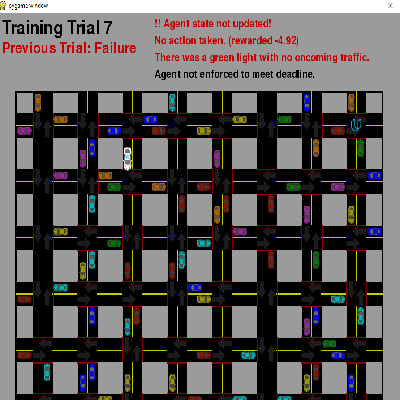

In [10]:
pil_im= Image.open("figura1.png") 
pil_im.resize((400,400))


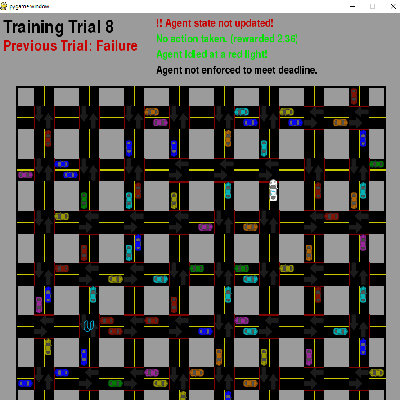

In [8]:
pil_im2= Image.open("figura2.png") 
pil_im2.resize((400,400))

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
1) O arquivo Python agent.py apresenta várias flags que podem ser configuradas:

num_dummies - Por padrão, o número de agentes discretos no ambiente é de 100, esta flag permite realizar a configuração desse valor.

alpha   - Por padrão o valor é 0.5, é uma tag que permite realizar a configuração de um valor contínuo para a taxa de aprendizagem. 

enforce_deadline - A configuração permite alteração para True para forçar o driving agent a capturar se ele chega na destinação a tempo.

2)O arquivo Python environments.py, possui uma função act que é chamada quando o agente executa uma ação. Esta função considera uma ação e a executa. Esta ação pode receber 4 tipos diferentes de violações que são: pequenas e grandes violações de trânsito sem/com a consequência de acidentes. 

3)O arquivo Python simulator.py apresenta as seguintes funções: 

render_text() É a non_GUI render. O output da simulação será renderizado e mostrado no command line interface.

função render(): É a GUI render. O output da simulação será mostrado por meio da GUI do pygame, como é possível visualizar nas figuras 1 e 2 que mostram as informações das simulações, o smartcab(carro branco), os diversos carros, as interseções,...

4)A função 'next_waypoint()' do arquivo Python planner.py verifica primeiramente a direção East-West e somente depois a North-South.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

**Observação**: Realizando-se somente o ajuste de escolha das quatro opções de ações, observou-se que agora o carro se movimenta mais, virando para a direta, seguindo em frente, virando para a esquerda e as vezes para no mesmo ponto, mas logo já realiza uma outra ação.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


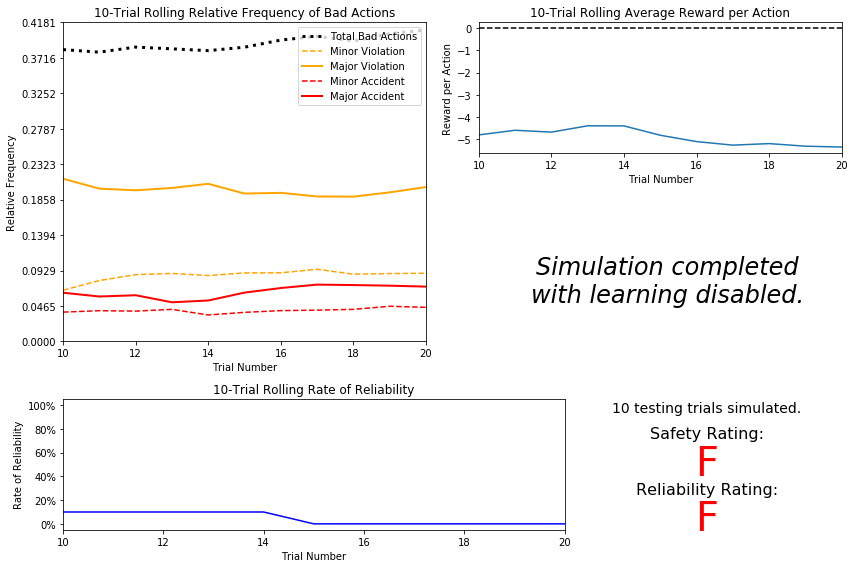

In [5]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

O gráfico "10 - Trial Rolling Relativa Frequency of Bad Actions" mostra os resultados e as frequências de ações que o driving agent executou. Pode-se perceber que o valor de "Total Bad Actions" é muito alto,e a partir do aumento do número de Trials este valor aumenta mais ainda.

Sim, a taxa de reliability faz sentido. A função calculate_reliability realiza o cálculo da taxa de reliability do smartcab durante o teste, neste caso que ele fez escolhas aleatórias, ele obteve uma taxa de reliabilily menor que 20%, por isso recebeu uma pontuação F que é corresponde a ter obtido uma taxa de sucesso menor que 60%. Isto é previsível, pois ele está escolhendo as ações aleatoriamente sem considerar as leis e as condições de trânsito, por isso neste primeiro momento ele está cometendo muitas falhas.

O driving agent está recebendo recompensas negativas para as suas ações. De acordo com o arquivo Python environment.py
cada tipo de ação ruim recebe um reward negativo, como por exemplo, "minor violation" recebe -5 e "major accident" recebe -40. Pelo gráfico "10-Trial Rolling Average Reward per Action", percebe que as recompensas já começam negativas, e elas vão aos poucos recebendo mais pontos negativos a partir que o número de trials aumenta. Na minha análise, o carro cometeu muitas ações ruins e por isso recebeu muitos rewards negativos resultando assim em um score F para Reliability e Safety.

O smartcab não é seguro e nem confiável para os passageiros. Pelos seguintes motivos: As métricas de reliability e safety apresentam o pior score possível que é F, isso significa que o agente causa pelo menos um acidente grande, como seguir em frente quando o sinal está vermelho e com tráfico, e também falha em chegar ao seu destino a tempo em pelo menos 60% das viagens.Além disso, pela análise anterior, podemos perceber que o carro cometeu muitas ações ruins, e essas ações ruins interferem diretamente nas avaliações das métricas.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**
O objetivo do Smartcab é atingir o seguinte cenário: Conduzir o passageiro de um ponto ao outro de forma segura, ou seja, evitando a ocorrência de acidentes e também de forma eficiente, ou seja, chegar ao destino em um tempo hábil. É claro que o tempo hábil depende das condições que o trânsito apresenta naquele determinado momento. 

Abaixo, segue a análise de todas as features:

waypoint: O smartcab tem como objetivo chegar ao seu destino e esta variável apresenta a direção que o Smartcab deve seguir para atingir isso. Existem várias rotas que podem ser feitas para se chegar a um destino e o Smartcab deve levar em consideração "trajetos perigosos" que devem ser evitados durante esta rota para assim aumentar a segurança e eficiência do serviço prestado. O tempo de rota é importante pois afeta diretamente na eficiência do Smartcab, porém a segurança deve prevalecer, visto que não adianta priorizar o "menor tempo" pois este pode gerar diminuição na taxa de Safety o que acarretaria em aumento no número de acidentes.

light: Como nas leis de trânsito, as luzes do semáforo influenciam no trajeto do smartcab. Este agent deve ser capaz de compreender as ações que deve tomar de acordo com as luzes, pois se um smartcab não segue "forward" quando a luz está verde ele para o trânsito todo, e se ele não pára quando a luz está vermelha pode acontecer um acidente. Então, esta varíavel é muito importante para a segurança e eficiência do smartcab.

oncoming: É a direção pretendida de viagem para um veículo através do cruzamento do Smartcab. Essa é uma feature importante visto que a direção do smartcab não deve se encontrar com a direção do fluxo de cruzamento, pois pode ocorrer acidentes.

left e right: É a direção pretendida de viagem para um veículo, respectivamente, para a esquerda e direita do Smartcab. Essas variáveis tem sua importância, pois este parâmetro indica se existe um veículo presente na direita/esquerda do Smartcab,assim a ação que o Smartcab vai realizar pode mudar se houver um veículo presente. Estas features não foram consideradas no treinamento do Smartcab, pois o tamanho do espaço aumentaria, por isso optou-se por não utiliza-las.

deadline: A eficiência do smartcab apresenta a questão de chegar ao destino em um tempo hábil, e esta variável está relacionada com o número de ações que faltam para que o smartcab chegue ao seu destino antes do tempo acabar. Esta variável não tem a mesma importância que as outras, pois diferentemente do waypoint, por exemplo, que aponta o destino que o smartcab vai chegar, essa variável tem a ver com o tempo limite que o smartcab deve chegar ao destino e o smartcab não precisa saber disso para realizar suas ações. Por isso, foi desconsiderada, pois o objetivo não é treinar o smartcab para que chegue ao destino no menor tempo possível e sim faze-lo obdecer as leis de trânsito. Outro motivo dela não ter sido considerada tem a ver com a definição do tamanho do espaço,pois se ela fosse acrescentada o tamanho do espaço iria aumentar muito, e consequentemente o driving agent poderia nunca aprender o que fazer em alguns states.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Na resposta quatro foram selecionadas quatro features. Se um state é definido utilizando as features abaixo, então cada state receberá as seguintes features e valores correspondes:

- light : Duas ações: red ou green;
- left : Quatro valores: None, left, right, forward;
- right : Quatro valores: - None, left, right, forward;
- oncoming: Quatro valores: - None, left, right, forward;
- waypoint: Três valores - left, right, forward; # Check if the chosen waypoint is safe to move to.
- deadline: 5 time steps por interseção. #deadline = distance * 5

O tamanho deste espaço com as quatro features seria: 2 x 4 x 4 x 4 x 3 = 384 + o valor da deadline. Este valor é um valor alto e provalvemente o agent não terá tempo de aprender tudo isso e conseguir tomar uma ação com base nas politicas/p(s,a) formadas, pois a quantidade de states possíveis é muito grande e pode ser que o driving agent não consiga aprender o que fazer em alguns states prejudicando assim sua eficiência. Por isso, decidi reduzir para somente três features que são: light,oncoming e waypoint, removendo-se deadline pois ela envolve um cálculo que multiplica-se a "distance por 5", ou seja, utiliza-la aumentaria muito o tamanho do espaço do state. Enfim, essa mudança faz com que o tamanho do espaço do state seja: 2 x 4 x 3 = 24.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

Observação: Foi acrescentado as features de acordo com a questão 4 em "build_state()", e observa-se que agora o driving agent está atualizando o seu estado.

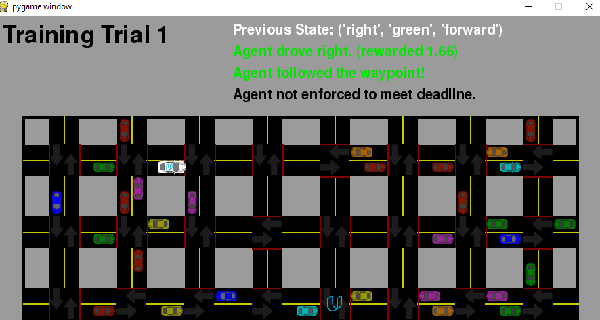

In [14]:
pil_im2= Image.open("figura3.png") 
pil_im2.resize((600,320))

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

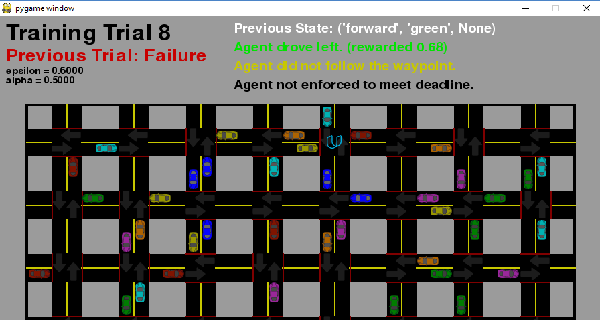

In [12]:
pil_im2= Image.open("figura4.png") 
pil_im2.resize((600,320))

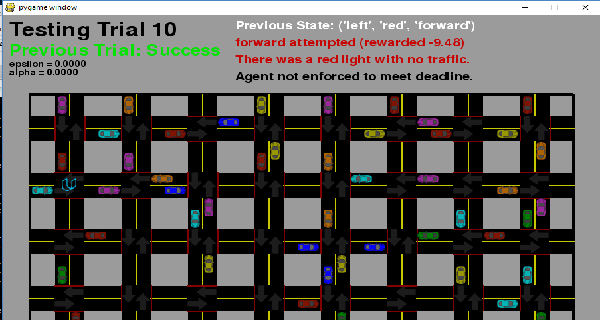

In [13]:
pil_im2= Image.open("figura5.png") 
pil_im2.resize((600,320))

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

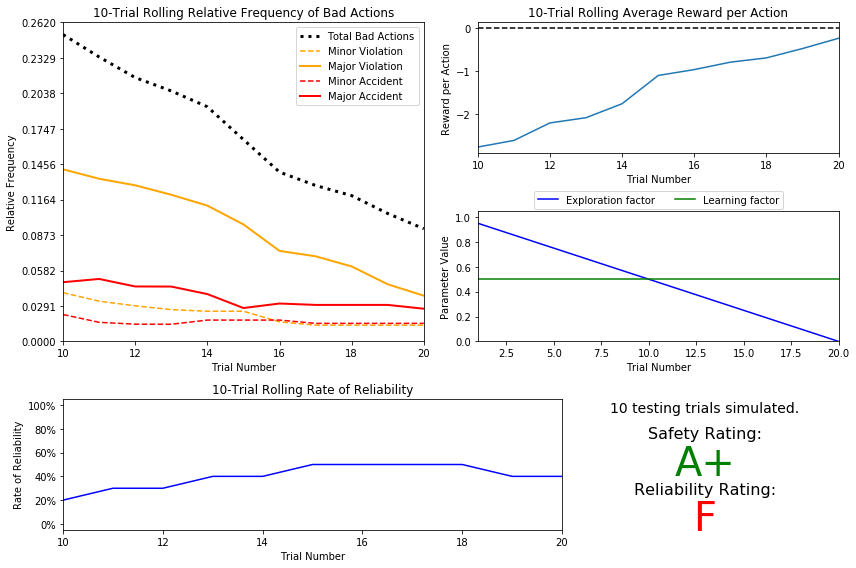

In [8]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
1) As duas visualizações geradas anteriormente pela simulação são bem diferentes. A primeira obteve um score F para Safety e Reliability, e a segunda obteve uma boa pontuação em Safety Rating e uma pontuação ruim em Reliability Rating.

2)A figura 6, mostra que a quantidade de training trails foi de 20. Este número faz sentido, pois o valor inicial de epsilon é 1 e a cada training trial esse valor vai diminuindo - 0.05.

3)Sim, a função decaying que foi implementada possui precisão e está representada nos parâmetros do painel.

4)Sim, a partir do momento que o número de training trials vai aumentando, percebe-se a diminuição gradativa dos números de bad actions e consequentemente temos um aumento na média da recompensa.

5)Safety Rating obteve uma boa pontuação, porém Reability Score não obteve melhora continuando assim com a mesma pontuação do driving agent inicial.

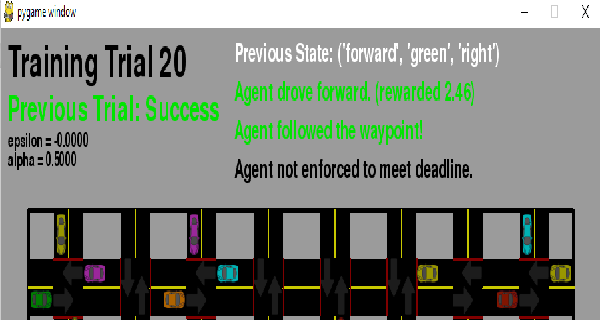

In [10]:
pil_im2= Image.open("figura6.png") 
pil_im2.resize((600,320))

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

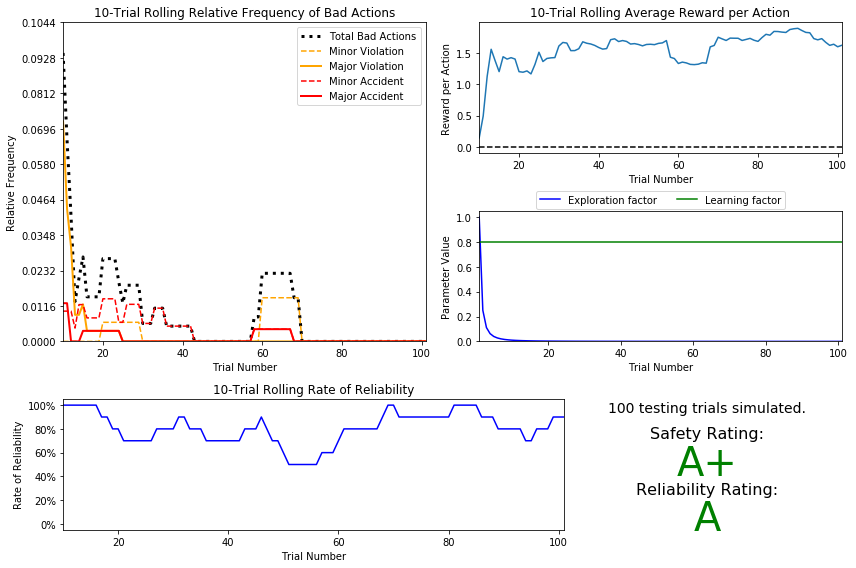

In [9]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

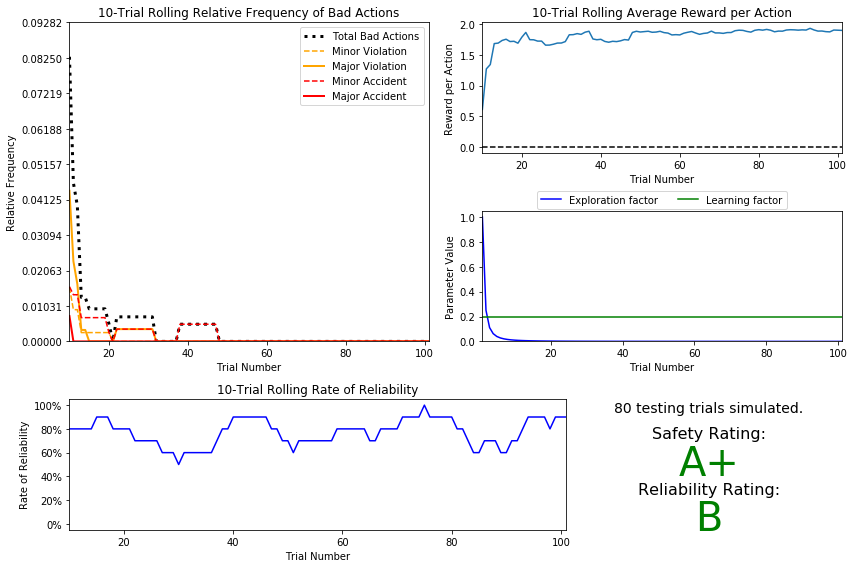

In [39]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

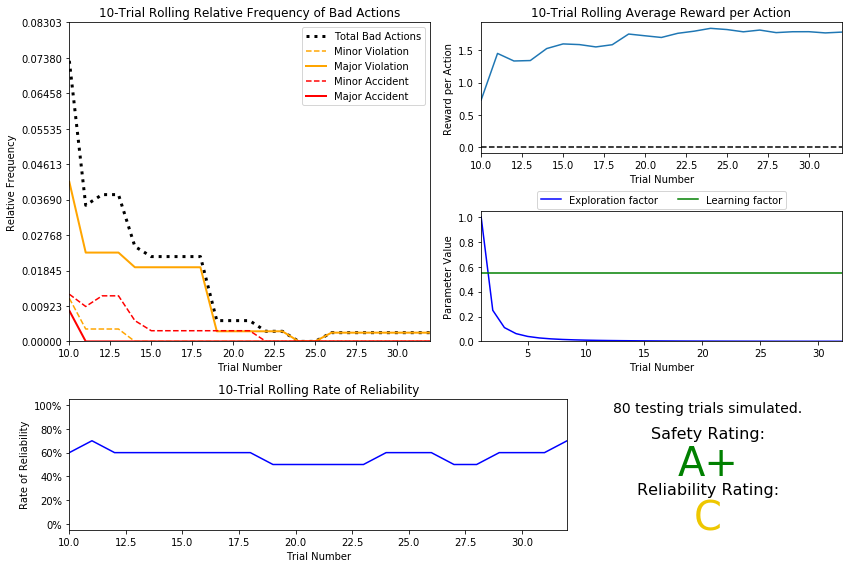

In [26]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

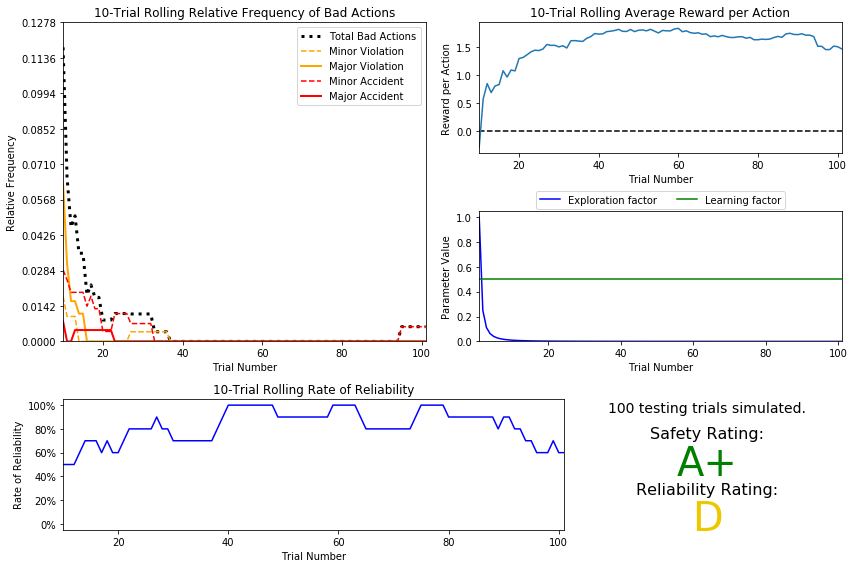

In [8]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** 

A função de ϵ=1/t² foi implementada e executou-se alguns testes por meio do aumento e diminuição das variáveis epsilon_tolerance e Alpha. O melhor resultado obtido com esta função pode ser visualizado no primeiro gráfico que mostra que Safety obteve A+ e Reliability A. Esse resultado foi possível com a alteração de: epsilon_tolerance=0.0001 e Alpha=0.8 e foi necessário aproximadamente 100 training trials. O número de testes foi 100 e estes valores dos parâmetros foram escolhidos pois foram os que possibilitaram o melhor resultado para as duas avaliações. Assim sendo, reduziu-se o valor de epsilon_tolerance com o objetivo de expandir a fase de treino do driving agent e aumentou-se learning rate para obtenção de uma convergência mais rápida.

Este Q-Learner teve um desempenho melhor que o outro Q-Learner padrão, pois proporcionou o aumento dos ratings de Safety e Reliability. Antes Safety estava com um rating de A e agora está com A+ e Reability tinha a pior rating que era F e agora está com A. Os resultados apresentaram valores de Ratings significativos tanto para Safety quanto para Reliability, e é possível perceber também que as recompensas aumentaram e as ações ruins diminuiram de acordo com o aumento no número de trials. 

A obtenção de A+ para o Safety Rating significa que o agente não cometeu violações no trânsito e sempre escolheu a ação correta e a obtenção de A em Reliability significa que o agente chegou ao destino a tempo para pelo menos 90% das viagens. Por estes motivos, estou satisfeita com os valores obtidos neste teste, pois os resultados demostraram-se superiores aos do teste antigo. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:**
Os states que foram definidos foram: waypoint, light e oncoming.

O exemplo 1 apresenta uma optimal policy, P(s,a). 

No primeiro exemplo, temos uma optimal policy em que os Q-valores apresentam os valores esperados para as ações. Nesta situação o waypoint está apontado para forward e o sinal está red e a melhor ação que está sendo escolhida é "None:1.36" que é a ação correta. As outras ações receberam recompensas negativas, visto que se fossem executadas resultariam em possíveis acidentes.

('forward', 'red', None)
 
 -- forward : -7.54
 
 -- right : -16.35
 
 -- None : 1.36
 
 -- left : -7.29

No segundo exemplo temos uma suboptimal policy em que os Q-valores não foram os esperados para as ações. Neste caso a melhor ação é "Right:1.36", porém não é a mais adequada visto que o waypoint está apontado para left, light está green e oncoming left, sendo assim a melhor ação deveria ser left. Acredito que esta escolha errada tem a ver com o rating de Reliability que obteve A ao invés de A+, e assim sendo, as ações None e Left não foram exploradas. Ressalto que junto com a ação Right, foi explorada também a ação "forward" que recebeu obviamente uma recompensa negativa, pois o ato de seguir em frente causaria acidente. Dessa forma com a escolha da ação Right, o carro irá atrasar mais para chegar ao seu destino.
 
('left', 'green', 'left')
 
 -- forward : -0.14
 
 -- right : 1.36
 
 -- None : 0.00
 
 -- left : 0.00

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

A implementação do Smartcab foi realizada para obter recompensas positivas ou negativas conforme as leis de trânsito com o objetivo final de chegar ao destino. Por isso, a implementação do Q-Learning não teve essa questão de recompensas futuras visto que as recompensas obtidas na implementação são instantâneas. Assim, o driving agent está tentando chegar ao seu destino antes de um determinando tempo, porém não há recompensa extra em relação ao seu tempo de chegada, até mesmo porque o smarcab não guarda os valores de states anteriores. Em relação ao ambiente, o smartcab recebe e confia nas intruções de como chegar ao seu destino por meio do planner que elabora as instruções que ele deve seguir, assim sendo, ele não planeja sozinho o caminho que o levará até o destino. E também a cada trial, o agente e o destino mudam e o mesmo ocorre com as outras variáveis do ambiente, dessa forma o agente não consegue "decorar" o melhor caminho.Por fim,a policy é baseada nas regras de trânsito e não em uma recompensa adicional para atingir o objetivo de chegar ao destino,por isso o environment envalidaria o uso de recompensas futuras o que afetaria negativamente o Q-values.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

Referências:

http://mnemstudio.org/path-finding-q-learning-tutorial.htm

https://www.cs.indiana.edu/~gasser/Salsa/rl.html

https://discussions.udacity.com/t/how-to-set-the-action-values/202838/2

https://discussions.udacity.com/t/q6-tests-dont-run/203953/4